In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [0]:
aisles= pd.read_csv('aisles.csv')
departments=pd.read_csv('departments.csv')
order_products_prior=pd.read_csv('order_products__prior.csv')
order_products_train=pd.read_csv('order_products__train.csv')
orders=pd.read_csv('orders.csv')
products=pd.read_csv('products.csv')

In [3]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
len(orders)

3421083

In [10]:
#checking for missing values
total=orders.isnull().sum()
total

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [11]:
orders_new=orders[orders['days_since_prior_order'].notnull()]
orders_new.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [12]:
#aisles
total_a=aisles.isnull().count()
total_a

aisle_id    134
aisle       134
dtype: int64

In [13]:
total_d=departments.isnull().count()
total_d

department_id    21
department       21
dtype: int64

In [14]:
#orders_prior
total_order_p_p=order_products_prior.isnull().sum()
total_order_p_p

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [15]:
#order_train
total_order_train=order_products_train.isnull().sum()
total_order_train

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [16]:
#products
total_products=products.isnull().sum()
total_products


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [17]:
count=orders['eval_set'].value_counts()
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

Text(0.5, 1.0, 'Eval_set breakdown in orders dataset')

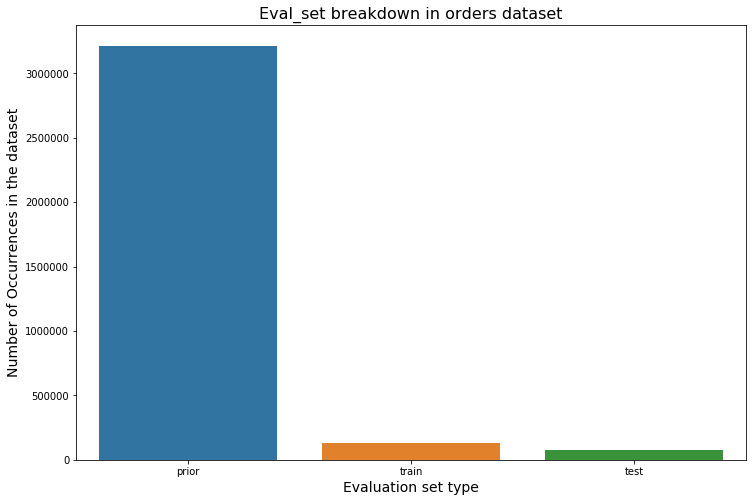

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences in the dataset', fontsize=14)
plt.xlabel('Evaluation set type', fontsize=14)
plt.title('Eval_set breakdown in orders dataset', fontsize=16)

In [19]:
merged = pd.merge(order_products_train, orders, on='order_id', how='left')
merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [20]:
df_merged = pd.merge(merged, products, on='product_id', how='left')
df_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15


In [21]:
df = pd.merge(df_merged, departments, on='department_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [22]:
df_new = df.copy()
df_new.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [0]:
del df['eval_set']

In [0]:
del df['add_to_cart_order']

In [25]:
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [0]:
#Getting average days between orders as a feature by using days_since_prior_order
df['average_days_between_orders'] = orders_new.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
df['average_days_between_orders'] = df['average_days_between_orders'].replace(np.nan, 0)

In [0]:
df['average_days_between_orders'] = df['average_days_between_orders'].replace(0, 1)

In [0]:
#number of orders as a feature using the orders_new dataset
df['nb_orders'] = orders_new.groupby('user_id').size().astype(np.int16)
df['nb_orders'] = df['nb_orders'].replace(np.nan, 0)

In [0]:
#Getting the total items using the entire dataset 
df['total_items'] = df_merged.groupby('user_id').size().astype(np.int16)
df['total_items'] = df['total_items'].replace(np.nan, 0)

In [30]:
#getting average basket as afeature by using total items and number of orders
df['average_basket'] = (df.total_items /df.nb_orders).astype(np.float32)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,average_days_between_orders,nb_orders,total_items,average_basket
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,NaN
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0,2.214286
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000


In [0]:
df['average_basket'] = df['average_basket'].replace(np.nan, 0)

In [0]:
# creating a days_since_ratio using days_since_prior_order and average_days_between_orders
df['days_since_ratio'] = df.days_since_prior_order / df.average_days_between_orders

In [33]:
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,0.000000,9.000000
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000,0.473684
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0,2.214286,0.552632
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000,0.750000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000,0.529412


In [0]:
del df['user_id']
del df['product_name']
del df['department']

In [35]:
df.head()

,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio
0,1,49302,1,4,4,10,9.0,120,16,1.000000,0.0,0.0,0.000000,9.000000
1,1,11109,1,4,4,10,9.0,108,16,19.000000,10.0,11.0,1.100000,0.473684
2,1,10246,0,4,4,10,9.0,83,4,16.285715,14.0,31.0,2.214286,0.552632
3,1,49683,0,4,4,10,9.0,83,4,12.000000,12.0,0.0,0.000000,0.750000
4,1,43633,1,4,4,10,9.0,95,15,17.000000,5.0,0.0,0.000000,0.529412


In [0]:
hour = {c:i for i,c in enumerate(df['order_hour_of_day'].unique())}

In [0]:
aisle = {c:i for i,c in enumerate(df['aisle_id'].unique())}
dept = {c:i for i,c in enumerate(df['department_id'].unique())}
product = {c:i for i,c in enumerate(df['product_id'].unique())}

In [0]:
df['aisle_new'] = [float(aisle[t]) for t in df.aisle_id]

In [0]:
df['dept_new'] = [float(dept[t]) for t in df.department_id]

In [0]:
df['product_new'] = [float(product[t]) for t in df.product_id]

In [0]:
df['order_hour_of_day_new'] = [float(hour[t]) for t in df.order_hour_of_day]

In [42]:
df['order_hour_of_day_new'].value_counts()

5.0     119370
11.0    116198
6.0     114762
15.0    114119
8.0     111752
0.0     110479
2.0     110237
9.0      96944
10.0     93856
1.0      76522
4.0      67386
13.0     58175
3.0      40920
12.0     36302
7.0      34813
16.0     27319
17.0     16965
14.0     11847
18.0      9083
20.0      5626
22.0      3847
21.0      3226
23.0      2438
19.0      2431
Name: order_hour_of_day_new, dtype: int64

In [43]:
dow = {c:i for i,c in enumerate(df['order_dow'].unique())}
df['order_dow_new'] = [float(dow[t]) for t in df.order_dow]
dspo = {c:i for i,c in enumerate(df['days_since_prior_order'].unique())}
df['days_since_prior_order__new'] = [float(dspo[t]) for t in df.days_since_prior_order]
df['reordered'] = df['reordered'].astype('float')
df.head()

,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,49302,1.0,4,4,10,9.0,120,16,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11109,1.0,4,4,10,9.0,108,16,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,10246,0.0,4,4,10,9.0,83,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,49683,0.0,4,4,10,9.0,83,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,43633,1.0,4,4,10,9.0,95,15,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [44]:
del df['aisle_id']
del df['department_id']
df.head()

,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,49302,1.0,4,4,10,9.0,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11109,1.0,4,4,10,9.0,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,10246,0.0,4,4,10,9.0,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,49683,0.0,4,4,10,9.0,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,43633,1.0,4,4,10,9.0,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [0]:
del df['order_hour_of_day']
del df['order_dow']
del df['days_since_prior_order']
del df['product_id']

In [46]:
df.head()

,order_id,reordered,order_number,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,1.0,4,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,4,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,0.0,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,0.0,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,1.0,4,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [47]:
y=df['reordered']
del df['reordered']
df.head()

,order_id,order_number,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,4,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,4,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df, y, test_size=0.30, random_state=5)

In [49]:
Xtest.head()

,order_id,order_number,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
838325,2067140,45,1.0,0.0,0.0,0.0,5.0,11.0,4.0,4839.0,5.0,0.0,20.0
480837,1178566,6,1.0,0.0,0.0,0.0,30.0,14.0,7.0,4964.0,16.0,1.0,1.0
370883,905516,12,1.0,0.0,0.0,0.0,7.0,4.0,1.0,111.0,4.0,4.0,13.0
1045066,2585010,53,1.0,0.0,0.0,0.0,5.0,55.0,5.0,20225.0,15.0,4.0,20.0
270912,659268,18,1.0,0.0,0.0,0.0,7.0,85.0,10.0,2847.0,6.0,6.0,13.0


In [50]:
import tensorflow.compat.v1 as tf
from tensorflow.contrib.boosted_trees.estimator_batch.estimator import GradientBoostedDecisionTreeClassifier

In [0]:
feature_columns = []
for feature_name in df:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,
                                                          dtype=tf.float32))

In [0]:
NUM_EXAMPLES = len(ytrain)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    if shuffle:
      dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).    
    dataset = dataset.repeat(n_epochs)
    # In memory training doesn't use batching.
    dataset = dataset.batch(NUM_EXAMPLES)
    return dataset
  return input_fn

# Training and evaluation input functions.
train_input_fn = make_input_fn(Xtrain, ytrain)
eval_input_fn = make_input_fn(Xtest, ytest, shuffle=False, n_epochs=1)

In [53]:
params = {
  'n_trees': 50,
  'max_depth': 3,
  'n_batches_per_layer': 1,
  'center_bias': True
}
n_batches = 1
est = tf.estimator.BoostedTreesClassifier(feature_columns,**params)
# Train model.
est.train(train_input_fn,max_steps=100)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfx1zbyuv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7a4bad4278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constra

In [54]:
result = est.evaluate(eval_input_fn)


INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-11T13:07:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfx1zbyuv/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-11-13:07:41
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.66161835, accuracy_baseline = 0.59868413, auc = 0.7022958, auc_precision_recall = 0.77251637, average_loss = 0.6111676, global_step = 100, label/mean = 0.59868413, loss = 0.6111676, precision = 0.6818136, prediction/mean = 0.59984946, recall = 0.8152482
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Saving 'checkpoint_pa

In [55]:
pd.Series(result).to_frame()

,0
accuracy,0.661618
accuracy_baseline,0.598684
auc,0.702296
auc_precision_recall,0.772516
average_loss,0.611168
label/mean,0.598684
loss,0.611168
precision,0.681814
prediction/mean,0.599849
recall,0.815248
